In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# FETCHING DATA

data_train = pd.read_csv('/kaggle/input/feedback-prize-english-language-learning/train.csv')
data_valid = pd.read_csv('/kaggle/input/feedback-prize-english-language-learning/test.csv')

sentences_tr = np.array(data_train['full_text'])
grammer_score_tr = np.array(data_train['grammar'])

max_len = max(len(x) for x in sentences_tr)

In [4]:
# TOKENISING DATA
min_words = 10000

tokeniser = Tokenizer(num_words=min_words,oov_token='<OOV>') # oov = out of vocabulary
tokeniser.fit_on_texts(sentences_tr)

total_words = tokeniser.word_index.items()
num_words = len(tokeniser.word_index)

#padding
sentences_tr_seq = tokeniser.texts_to_sequences(sentences_tr)
sentences_tr_pad = pad_sequences(sentences_tr_seq)

In [5]:
import numpy as np
training_padded = np.array(sentences_tr_pad)
training_labels = np.array(grammer_score_tr)

In [6]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words,34,input_length = max_len),
     tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mae",
)

2023-01-03 10:58:29.442008: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
history = model.fit(
    training_padded,training_labels,
    epochs = 50,
    callbacks = [early_stopping]
)

2023-01-03 10:58:29.892846: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
123/123 [==============================] - 2s 13ms/step - loss: 0.8967
Epoch 2/50
123/123 [==============================] - 2s 12ms/step - loss: 0.5402
Epoch 3/50
123/123 [==============================] - 2s 12ms/step - loss: 0.4956
Epoch 4/50
123/123 [==============================] - 2s 12ms/step - loss: 0.4634
Epoch 5/50
123/123 [==============================] - 2s 13ms/step - loss: 0.4382
Epoch 6/50
123/123 [==============================] - 2s 13ms/step - loss: 0.4142
Epoch 7/50
123/123 [==============================] - 2s 13ms/step - loss: 0.3906
Epoch 8/50
123/123 [==============================] - 2s 14ms/step - loss: 0.3728
Epoch 9/50
123/123 [==============================] - 2s 13ms/step - loss: 0.3551
Epoch 10/50
123/123 [==============================] - 2s 13ms/step - loss: 0.3415
Epoch 11/50
123/123 [==============================] - 2s 19ms/step - loss: 0.3121
Epoch 12/50
123/123 [==============================] - 2s 13ms/step - loss: 0.2984
Epoch 13/50
1

<AxesSubplot:>

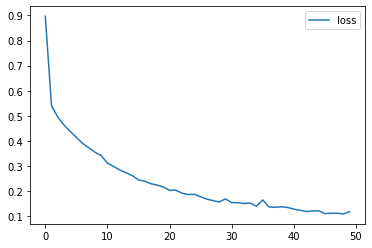

In [8]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()

In [9]:
sentences_test = np.array(data_valid['full_text'])
sentences_test_seq = tokeniser.texts_to_sequences(sentences_test)
sentences_test_pad = pad_sequences(sentences_test_seq)

grammar_sc = model.predict(sentences_test_pad)
print(grammar_sc)

[[2.2150252]
 [2.4021266]
 [3.2880664]]
